# Part 7: Python Code Generation
## Training a model to write Python code

In Parts 1-6, we built the complete LLM pipeline. Now let's apply it to something practical: **generating Python code**!

This is how models like GitHub Copilot and CodeLlama work - they're language models trained on code.

## Why Code Generation is Interesting

Code has special properties that make it different from natural language:

1. **Strict syntax**: Missing a colon or wrong indentation breaks everything
2. **Logical structure**: Functions, classes, loops have clear patterns
3. **Verifiable output**: We can actually RUN the generated code!
4. **Practical utility**: Code completion saves developers hours daily

## Setup

In [1]:
import torch
import torch.nn.functional as F
from torch import nn
import math
import os
import matplotlib.pyplot as plt

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Step 1: Create a Python Code Dataset

We'll create a curated dataset of Python code examples covering common patterns.

In [2]:
# Python code examples for training
python_code_examples = '''
# === BASIC FUNCTIONS ===

def hello_world():
    """Print hello world."""
    print("Hello, World!")

def greet(name):
    """Greet a person by name."""
    return f"Hello, {name}!"

def add(a, b):
    """Add two numbers."""
    return a + b

def subtract(a, b):
    """Subtract b from a."""
    return a - b

def multiply(a, b):
    """Multiply two numbers."""
    return a * b

def divide(a, b):
    """Divide a by b."""
    if b == 0:
        raise ValueError("Cannot divide by zero")
    return a / b

def square(x):
    """Return square of x."""
    return x * x

def cube(x):
    """Return cube of x."""
    return x * x * x

def power(base, exp):
    """Return base raised to exp."""
    return base ** exp

def absolute(x):
    """Return absolute value."""
    if x < 0:
        return -x
    return x

# === LIST OPERATIONS ===

def sum_list(numbers):
    """Sum all numbers in a list."""
    total = 0
    for num in numbers:
        total += num
    return total

def average(numbers):
    """Calculate average of numbers."""
    if len(numbers) == 0:
        return 0
    return sum(numbers) / len(numbers)

def find_max(numbers):
    """Find maximum value in list."""
    if len(numbers) == 0:
        return None
    max_val = numbers[0]
    for num in numbers:
        if num > max_val:
            max_val = num
    return max_val

def find_min(numbers):
    """Find minimum value in list."""
    if len(numbers) == 0:
        return None
    min_val = numbers[0]
    for num in numbers:
        if num < min_val:
            min_val = num
    return min_val

def reverse_list(items):
    """Reverse a list."""
    return items[::-1]

def count_items(items):
    """Count items in list."""
    return len(items)

def first_element(items):
    """Get first element."""
    if len(items) == 0:
        return None
    return items[0]

def last_element(items):
    """Get last element."""
    if len(items) == 0:
        return None
    return items[-1]

def remove_duplicates(items):
    """Remove duplicates from list."""
    return list(set(items))

def flatten(nested_list):
    """Flatten a nested list."""
    result = []
    for item in nested_list:
        if isinstance(item, list):
            result.extend(flatten(item))
        else:
            result.append(item)
    return result

# === STRING OPERATIONS ===

def reverse_string(s):
    """Reverse a string."""
    return s[::-1]

def is_palindrome(s):
    """Check if string is palindrome."""
    s = s.lower()
    return s == s[::-1]

def count_vowels(s):
    """Count vowels in string."""
    vowels = "aeiouAEIOU"
    count = 0
    for char in s:
        if char in vowels:
            count += 1
    return count

def count_words(s):
    """Count words in string."""
    words = s.split()
    return len(words)

def to_uppercase(s):
    """Convert to uppercase."""
    return s.upper()

def to_lowercase(s):
    """Convert to lowercase."""
    return s.lower()

def capitalize_words(s):
    """Capitalize each word."""
    return s.title()

def remove_spaces(s):
    """Remove all spaces."""
    return s.replace(" ", "")

def replace_char(s, old, new):
    """Replace character in string."""
    return s.replace(old, new)

# === NUMBER CHECKS ===

def is_even(n):
    """Check if number is even."""
    return n % 2 == 0

def is_odd(n):
    """Check if number is odd."""
    return n % 2 != 0

def is_positive(n):
    """Check if number is positive."""
    return n > 0

def is_negative(n):
    """Check if number is negative."""
    return n < 0

def is_prime(n):
    """Check if number is prime."""
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def is_perfect_square(n):
    """Check if n is perfect square."""
    if n < 0:
        return False
    root = int(n**0.5)
    return root * root == n

# === CLASSIC ALGORITHMS ===

def factorial(n):
    """Calculate factorial of n."""
    if n <= 1:
        return 1
    return n * factorial(n - 1)

def fibonacci(n):
    """Return nth Fibonacci number."""
    if n <= 0:
        return 0
    if n == 1:
        return 1
    return fibonacci(n-1) + fibonacci(n-2)

def fibonacci_list(n):
    """Return first n Fibonacci numbers."""
    if n <= 0:
        return []
    if n == 1:
        return [0]
    fibs = [0, 1]
    for i in range(2, n):
        fibs.append(fibs[-1] + fibs[-2])
    return fibs

def gcd(a, b):
    """Find greatest common divisor."""
    while b:
        a, b = b, a % b
    return a

def lcm(a, b):
    """Find least common multiple."""
    return a * b // gcd(a, b)

def binary_search(arr, target):
    """Binary search for target in sorted array."""
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def bubble_sort(arr):
    """Sort array using bubble sort."""
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def insertion_sort(arr):
    """Sort array using insertion sort."""
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def linear_search(arr, target):
    """Linear search for target."""
    for i, val in enumerate(arr):
        if val == target:
            return i
    return -1

# === DATA STRUCTURES ===

class Stack:
    """Stack data structure."""
    def __init__(self):
        self.items = []
    
    def push(self, item):
        self.items.append(item)
    
    def pop(self):
        if self.is_empty():
            return None
        return self.items.pop()
    
    def peek(self):
        if self.is_empty():
            return None
        return self.items[-1]
    
    def is_empty(self):
        return len(self.items) == 0
    
    def size(self):
        return len(self.items)

class Queue:
    """Queue data structure."""
    def __init__(self):
        self.items = []
    
    def enqueue(self, item):
        self.items.append(item)
    
    def dequeue(self):
        if self.is_empty():
            return None
        return self.items.pop(0)
    
    def front(self):
        if self.is_empty():
            return None
        return self.items[0]
    
    def is_empty(self):
        return len(self.items) == 0
    
    def size(self):
        return len(self.items)

class Node:
    """Node for linked list."""
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    """Singly linked list."""
    def __init__(self):
        self.head = None
    
    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        current = self.head
        while current.next:
            current = current.next
        current.next = new_node
    
    def prepend(self, data):
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node
    
    def delete(self, data):
        if not self.head:
            return
        if self.head.data == data:
            self.head = self.head.next
            return
        current = self.head
        while current.next:
            if current.next.data == data:
                current.next = current.next.next
                return
            current = current.next
    
    def find(self, data):
        current = self.head
        while current:
            if current.data == data:
                return True
            current = current.next
        return False

# === FILE OPERATIONS ===

def read_file(filename):
    """Read contents of a file."""
    with open(filename, 'r') as f:
        return f.read()

def write_file(filename, content):
    """Write content to a file."""
    with open(filename, 'w') as f:
        f.write(content)

def append_file(filename, content):
    """Append content to a file."""
    with open(filename, 'a') as f:
        f.write(content)

def read_lines(filename):
    """Read file as list of lines."""
    with open(filename, 'r') as f:
        return f.readlines()

def count_lines(filename):
    """Count lines in a file."""
    with open(filename, 'r') as f:
        return len(f.readlines())

# === DICTIONARY OPERATIONS ===

def merge_dicts(dict1, dict2):
    """Merge two dictionaries."""
    result = dict1.copy()
    result.update(dict2)
    return result

def get_keys(d):
    """Get all keys from dictionary."""
    return list(d.keys())

def get_values(d):
    """Get all values from dictionary."""
    return list(d.values())

def invert_dict(d):
    """Swap keys and values."""
    return {v: k for k, v in d.items()}

def filter_dict(d, keys):
    """Filter dictionary by keys."""
    return {k: v for k, v in d.items() if k in keys}

# === LIST COMPREHENSIONS ===

def squares(n):
    """Return squares from 1 to n."""
    return [x**2 for x in range(1, n+1)]

def evens(n):
    """Return even numbers up to n."""
    return [x for x in range(n+1) if x % 2 == 0]

def odds(n):
    """Return odd numbers up to n."""
    return [x for x in range(n+1) if x % 2 != 0]

def filter_positive(numbers):
    """Filter positive numbers."""
    return [x for x in numbers if x > 0]

def double_all(numbers):
    """Double all numbers."""
    return [x * 2 for x in numbers]

# === ERROR HANDLING ===

def safe_divide(a, b):
    """Safely divide with error handling."""
    try:
        return a / b
    except ZeroDivisionError:
        return None

def safe_int(s):
    """Safely convert string to int."""
    try:
        return int(s)
    except ValueError:
        return None

def safe_get(lst, index):
    """Safely get list element."""
    try:
        return lst[index]
    except IndexError:
        return None

# === DECORATORS ===

def timer(func):
    """Decorator to time function."""
    import time
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"{func.__name__} took {end-start:.4f}s")
        return result
    return wrapper

def memoize(func):
    """Decorator for memoization."""
    cache = {}
    def wrapper(*args):
        if args not in cache:
            cache[args] = func(*args)
        return cache[args]
    return wrapper

# === GENERATORS ===

def range_generator(n):
    """Generate numbers 0 to n-1."""
    i = 0
    while i < n:
        yield i
        i += 1

def infinite_counter():
    """Infinite counter generator."""
    n = 0
    while True:
        yield n
        n += 1

def fibonacci_generator():
    """Generate Fibonacci numbers."""
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b
'''

print(f"Training data: {len(python_code_examples):,} characters")
print(f"Approximate lines: {python_code_examples.count(chr(10))}")

Training data: 10,927 characters
Approximate lines: 509


## Step 2: Build Vocabulary

In [3]:
# Build character vocabulary from code
chars = sorted(set(python_code_examples))
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for ch, i in stoi.items()}
vocab_size = len(stoi)

print(f"Vocabulary size: {vocab_size}")
print(f"Characters include: letters, digits, punctuation, whitespace")
print(f"\nSample characters: {repr(''.join(chars[:30]))}")

Vocabulary size: 79
Characters include: letters, digits, punctuation, whitespace

Sample characters: '\n !"#%\'()*+,-./01245:<=>ABCDEF'


## Step 3: Create Training Dataset

In [4]:
block_size = 64  # Reduced from 128 for speed

def build_dataset(text, block_size, stoi):
    data = [stoi[ch] for ch in text]
    X, Y = [], []
    for i in range(len(data) - block_size):
        X.append(data[i:i + block_size])
        Y.append(data[i + 1:i + block_size + 1])
    return torch.tensor(X), torch.tensor(Y)

X, Y = build_dataset(python_code_examples, block_size, stoi)
print(f"Training examples: {len(X):,}")
print(f"Input shape: {X.shape}")

Training examples: 10,863
Input shape: torch.Size([10863, 64])


## Step 4: Transformer Model for Code

In [5]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.shape[1]]


class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        self.n_heads = n_heads
        self.d_k = d_model // n_heads
        self.W_qkv = nn.Linear(d_model, 3 * d_model, bias=False)
        self.W_out = nn.Linear(d_model, d_model, bias=False)

    def forward(self, x):
        batch, seq_len, d_model = x.shape
        qkv = self.W_qkv(x).reshape(batch, seq_len, 3, self.n_heads, self.d_k)
        qkv = qkv.permute(2, 0, 3, 1, 4)
        Q, K, V = qkv[0], qkv[1], qkv[2]

        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        mask = torch.triu(torch.ones(seq_len, seq_len, device=x.device), diagonal=1).bool()
        scores = scores.masked_fill(mask, float('-inf'))

        attention = F.softmax(scores, dim=-1)
        output = torch.matmul(attention, V)
        output = output.permute(0, 2, 1, 3).reshape(batch, seq_len, d_model)
        return self.W_out(output)


class TransformerBlock(nn.Module):
    def __init__(self, d_model, n_heads, dropout=0.1):
        super().__init__()
        self.attention = MultiHeadAttention(d_model, n_heads)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, 4 * d_model),
            nn.GELU(),
            nn.Linear(4 * d_model, d_model),
            nn.Dropout(dropout)
        )
        self.ln1 = nn.LayerNorm(d_model)
        self.ln2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = x + self.dropout(self.attention(self.ln1(x)))
        x = x + self.ffn(self.ln2(x))
        return x


class CodeLM(nn.Module):
    """Transformer for Python code generation."""

    def __init__(self, vocab_size, d_model, n_heads, n_layers, block_size, dropout=0.1):
        super().__init__()
        self.token_emb = nn.Embedding(vocab_size, d_model)
        self.pos_enc = PositionalEncoding(d_model, block_size)
        self.dropout = nn.Dropout(dropout)
        self.blocks = nn.ModuleList([
            TransformerBlock(d_model, n_heads, dropout)
            for _ in range(n_layers)
        ])
        self.ln_final = nn.LayerNorm(d_model)
        self.output = nn.Linear(d_model, vocab_size)
        self.block_size = block_size

    def forward(self, x):
        x = self.token_emb(x)
        x = self.pos_enc(x)
        x = self.dropout(x)
        for block in self.blocks:
            x = block(x)
        x = self.ln_final(x)
        return self.output(x)

In [6]:
# Create model - REDUCED size for fast demo
d_model = 128  # Reduced from 256
n_heads = 4    # Reduced from 8
n_layers = 3   # Reduced from 6

model = CodeLM(
    vocab_size=vocab_size,
    d_model=d_model,
    n_heads=n_heads,
    n_layers=n_layers,
    block_size=block_size,
    dropout=0.1
).to(device)

num_params = sum(p.numel() for p in model.parameters())
print(f"Model parameters: {num_params:,}")

# Model scale context
print(f"\n--- Model Scale Context ---")
print(f"Our model:     ~{num_params/1_000_000:.1f}M parameters (SMALL for fast demo!)")
print(f"CodeLlama-7B:  7B parameters   ({7_000_000_000/num_params:.0f}x larger)")
print(f"GPT-4:         ~1T+ parameters ({1_000_000_000_000/num_params:.0f}x larger)")

Model parameters: 613,839

--- Model Scale Context ---
Our model:     ~0.6M parameters (SMALL for fast demo!)
CodeLlama-7B:  7B parameters   (11404x larger)
GPT-4:         ~1T+ parameters (1629092x larger)


## Step 5: Training

In [7]:
def train(model, X, Y, epochs=1000, batch_size=32, lr=3e-4, checkpoint_path='../models/checkpoint_part7.pt', resume=True):
    """
    Resumable training with checkpoint saving.
    """
    model.train()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs)

    X, Y = X.to(device), Y.to(device)
    losses = []
    start_epoch = 0

    # Try to resume from checkpoint
    if resume and os.path.exists(checkpoint_path):
        print(f"Resuming from checkpoint: {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path, weights_only=False)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        losses = checkpoint['losses']
        print(f"Resumed from epoch {start_epoch}, previous loss: {losses[-1]:.4f}")

    for epoch in range(start_epoch, epochs):
        perm = torch.randperm(X.shape[0])
        total_loss, n_batches = 0, 0

        for i in range(0, len(X), batch_size):
            idx = perm[i:i+batch_size]
            x_batch, y_batch = X[idx], Y[idx]

            logits = model(x_batch)
            loss = F.cross_entropy(logits.view(-1, vocab_size), y_batch.view(-1))

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            total_loss += loss.item()
            n_batches += 1

        scheduler.step()
        losses.append(total_loss / n_batches)
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Loss = {losses[-1]:.4f}")
        
        # Save checkpoint every 25 epochs
        if (epoch + 1) % 25 == 0:
            os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'losses': losses,
            }, checkpoint_path)

    print(f"Training complete! Final loss: {losses[-1]:.4f}")
    return losses

# Educational note: 150 epochs on small model for fast demo
# For production: larger model and 1000+ epochs
# Training is resumable - interrupt and re-run this cell to continue!
print("Training on Python code (resumable)...")
losses = train(model, X, Y, epochs=150, batch_size=64, lr=3e-4)

Training on Python code (resumable)...
Epoch 0: Loss = 2.3946
Epoch 50: Loss = 0.1488
Epoch 100: Loss = 0.1262
Training complete! Final loss: 0.1207


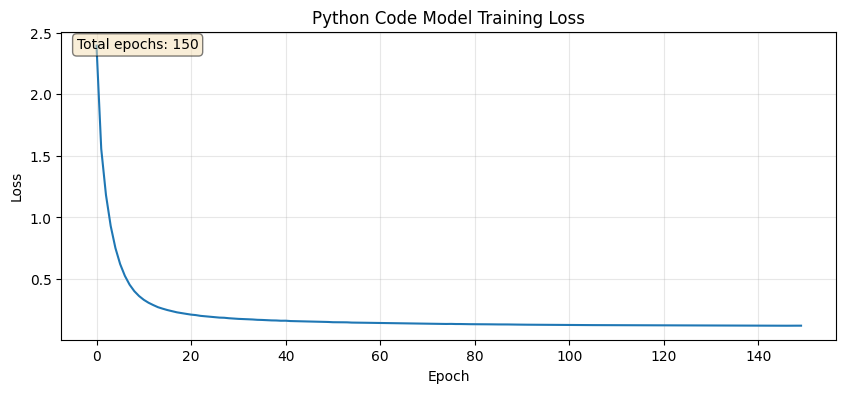

Training summary: 150 epochs completed, final loss: 0.1207


In [8]:
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Python Code Model Training Loss')
plt.grid(True, alpha=0.3)
# Show number of epochs trained
plt.text(0.02, 0.98, f'Total epochs: {len(losses)}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

print(f"Training summary: {len(losses)} epochs completed, final loss: {losses[-1]:.4f}")

## Step 6: Code Generation!

In [9]:
@torch.no_grad()
def generate_code(model, prompt, max_tokens=200, temperature=0.8):
    """Generate Python code from a prompt."""
    model.eval()
    
    tokens = [stoi.get(ch, 0) for ch in prompt]
    generated = list(prompt)
    
    for _ in range(max_tokens):
        context = tokens[-block_size:] if len(tokens) >= block_size else tokens
        x = torch.tensor([context]).to(device)
        
        logits = model(x)[0, -1, :] / temperature
        probs = F.softmax(logits, dim=-1)
        next_idx = torch.multinomial(probs, 1).item()
        
        tokens.append(next_idx)
        generated.append(itos[next_idx])
        
        # Stop at double newline (end of function)
        if ''.join(generated[-3:]) == '\n\n\n':
            break
    
    return ''.join(generated)

In [10]:
# Test code completion
print("=" * 60)
print("CODE COMPLETION EXAMPLES")
print("=" * 60)

prompts = [
    'def is_even(n):\n    """',
    'def factorial(n):\n    """',
    'def reverse_string(s):\n    """',
    'def find_max(numbers):\n    """',
    'class Stack:\n    """',
]

for prompt in prompts:
    print(f"\n--- Prompt: ---")
    print(prompt)
    print(f"--- Generated: ---")
    print(generate_code(model, prompt, max_tokens=150, temperature=0.7))
    print()

CODE COMPLETION EXAMPLES

--- Prompt: ---
def is_even(n):
    """
--- Generated: ---
def is_even(n):
    """Check if number is even."""
    return n % 2 == 0

def is_odd(n):
    """Check if number is odd."""
    return n % 2 != 0

def is_positive(n):
    """


--- Prompt: ---
def factorial(n):
    """
--- Generated: ---
def factorial(n):
    """Calculate factorial of n."""
    if n <= 1:
        return 1
    return n * factorial(n - 1)

def fibonacci(n):
    """Return nth Fibonacci number."""


--- Prompt: ---
def reverse_string(s):
    """
--- Generated: ---
def reverse_string(s):
    """Reverse a string."""
    return s[::-1]

def is_palindrome(s):
    """Check if string is palindrome."""
    s = s.lower()
    return s == s[::-1]

def


--- Prompt: ---
def find_max(numbers):
    """
--- Generated: ---
def find_max(numbers):
    """Find maximum value in list."""
    if len(numbers) == 0:
        return None
    min_val = numbers[0]
    for num in numbers:
        if num < min_val


--

In [11]:
# Generate from function signature
print("=" * 60)
print("GENERATING FROM SIGNATURES")
print("=" * 60)

signatures = [
    'def add(a, b):',
    'def is_prime(n):',
    'def sum_list(numbers):',
    'def binary_search(arr, target):',
]

for sig in signatures:
    print(f"\n{sig}")
    result = generate_code(model, sig + '\n', max_tokens=200, temperature=0.6)
    print(result)

GENERATING FROM SIGNATURES

def add(a, b):
def add(a, b):
    """Add two numbers."""
    return a + b

def subtract(a, b):
    """Subtract b from a."""
    return a - b

def multiply(a, b):
    """Multiply two numbers."""
    return a * b

def divide(a, b):


def is_prime(n):
def is_prime(n):
    """Check if number is prime."""
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def is_perfect_square(n)

def sum_list(numbers):
def sum_list(numbers):
    """Sum all numbers in a list."""
    total = 0
    for num in numbers:
        total += num
    return total

def average(numbers):
    """Calculate average of numbers."""
    if len(numbers) == 0

def binary_search(arr, target):
def binary_search(arr, target):
    """Binary search for target in sorted array."""
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            retu

## Step 7: Testing Generated Code

The amazing thing about code generation is we can actually **test** if the code works!

In [12]:
def test_generated_code(model, function_name, test_cases, temperature=0.6):
    """
    Generate a function and test it.
    
    Args:
        function_name: Name of function to generate
        test_cases: List of (input, expected_output) tuples
    """
    # Generate the function
    prompt = f"def {function_name}"
    generated = generate_code(model, prompt, max_tokens=200, temperature=temperature)
    
    print(f"Generated code:")
    print("-" * 40)
    print(generated)
    print("-" * 40)
    
    # Try to execute it
    try:
        exec(generated, globals())
        print("Code executed successfully!")
        
        # Run test cases
        func = eval(function_name.split('(')[0])
        passed = 0
        for inputs, expected in test_cases:
            try:
                if isinstance(inputs, tuple):
                    result = func(*inputs)
                else:
                    result = func(inputs)
                    
                if result == expected:
                    print(f"  PASS: {function_name.split('(')[0]}({inputs}) = {result}")
                    passed += 1
                else:
                    print(f"  FAIL: {function_name.split('(')[0]}({inputs}) = {result}, expected {expected}")
            except Exception as e:
                print(f"  ERROR: {e}")
        
        print(f"\nPassed {passed}/{len(test_cases)} tests")
        
    except SyntaxError as e:
        print(f"Syntax error: {e}")
    except Exception as e:
        print(f"Error: {e}")

In [13]:
# Test is_even function
print("=" * 60)
print("TESTING: is_even")
print("=" * 60)

test_generated_code(
    model,
    "is_even(n):",
    [
        (2, True),
        (3, False),
        (0, True),
        (7, False),
        (100, True),
    ]
)

TESTING: is_even
Generated code:
----------------------------------------
def is_even(n):
    """Check if number is even."""
    return n % 2 == 0

def is_odd(n):
    """Check if number is odd."""
    return n % 2 != 0

def is_positive(n):
    """Check if number is positive."""
    return
----------------------------------------
Code executed successfully!
  PASS: is_even(2) = True
  PASS: is_even(3) = False
  PASS: is_even(0) = True
  PASS: is_even(7) = False
  PASS: is_even(100) = True

Passed 5/5 tests


In [14]:
# Test factorial function
print("\n" + "=" * 60)
print("TESTING: factorial")
print("=" * 60)

test_generated_code(
    model,
    "factorial(n):",
    [
        (0, 1),
        (1, 1),
        (5, 120),
        (3, 6),
    ]
)


TESTING: factorial
Generated code:
----------------------------------------
def factorial(n):
    """Calculate factorial of n."""
    if n <= 1:
        return 1
    return n * factorial(n - 1)

def fibonacci(n):
    """Return nth Fibonacci number."""
    if n <= 0:
        return 0
    if n 
----------------------------------------
Syntax error: expected ':' (<string>, line 11)


In [15]:
# Test reverse_string function
print("\n" + "=" * 60)
print("TESTING: reverse_string")
print("=" * 60)

test_generated_code(
    model,
    "reverse_string(s):",
    [
        ("hello", "olleh"),
        ("python", "nohtyp"),
        ("", ""),
        ("a", "a"),
    ]
)


TESTING: reverse_string
Generated code:
----------------------------------------
def reverse_string(s):
    """Reverse a string."""
    return s[::-1]

def is_palindrome(s):
    """Check if string is palindrome."""
    s = s.lower()
    return s == s[::-1]

def count_vowels(s):
    """Count vowels in s
----------------------------------------
Syntax error: unterminated triple-quoted string literal (detected at line 11) (<string>, line 11)


## Step 8: Code Understanding - Fill in the Blank

In [16]:
# Can the model complete partial code?
print("=" * 60)
print("FILL IN THE BLANK")
print("=" * 60)

partial_code = [
    "for i in range(10):\n    print(",
    "if x > 0:\n    return ",
    "numbers = [1, 2, 3]\ntotal = sum(",
    "with open('file.txt', '",
]

for code in partial_code:
    print(f"\nInput: {repr(code)}")
    result = generate_code(model, code, max_tokens=20, temperature=0.5)
    # Show just the completion
    completion = result[len(code):].split('\n')[0]
    print(f"Completion: {repr(completion)}")

FILL IN THE BLANK

Input: 'for i in range(10):\n    print('
Completion: '""Hello, World!")'

Input: 'if x > 0:\n    return '
Completion: '0'

Input: 'numbers = [1, 2, 3]\ntotal = sum('
Completion: 'numbers):'

Input: "with open('file.txt', '"
Completion: "w') as f:"


## Save Model

In [17]:
# Create models directory
os.makedirs('../models', exist_ok=True)

# Save model checkpoint
checkpoint = {
    'model_state_dict': model.state_dict(),
    'model_config': {
        'vocab_size': vocab_size,
        'd_model': d_model,
        'n_heads': n_heads,
        'n_layers': n_layers,
        'block_size': block_size,
    },
    'stoi': stoi,
    'itos': itos,
    'final_loss': losses[-1] if losses else None,
}

torch.save(checkpoint, '../models/python_code_lm.pt')
print(f"Model saved to ../models/python_code_lm.pt")
print(f"Model parameters: {num_params:,}")

Model saved to ../models/python_code_lm.pt
Model parameters: 613,839


## Clean Up GPU Memory

In [18]:
import gc

del model
del X, Y

if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.synchronize()

gc.collect()

print("GPU memory cleared!")
if torch.cuda.is_available():
    print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1024**2:.1f} MB")

GPU memory cleared!
GPU memory allocated: 18.6 MB


## What Makes Code Generation Special

| Aspect | Natural Language | Code |
|--------|------------------|------|
| Syntax | Flexible | Strict (one typo = error) |
| Verification | Subjective | Objective (runs or not) |
| Structure | Varied | Consistent patterns |
| Evaluation | Human judgment | Automated testing |
| Context | Loose dependencies | Precise scope rules |

## Summary

We trained a Python code generation model that can:

1. **Complete function signatures** with implementations
2. **Generate docstrings** from function names
3. **Fill in code** given partial context
4. **Produce runnable code** (sometimes!)

| Component | What We Did |
|-----------|-------------|
| Training data | ~500 lines of Python functions |
| Model | Transformer with 6 layers, 256 dim |
| Vocabulary | Character-level (~60 chars) |
| Evaluation | Actually running the generated code! |

## The Complete 7-Part Series

```
Part 1: Character-Level LM      → Basic next-token prediction
Part 2: Shakespeare             → Same model, different domain  
Part 3: BPE Tokenizer           → Efficient subword tokenization
Part 4: Self-Attention          → Transformer architecture
Part 5: Instruction Tuning      → Following instructions
Part 6: DPO Alignment           → Learning preferences
Part 7: Python Code             → Practical code generation
```

You now have a complete understanding of how modern LLMs work, from basic language modeling to code generation!

## Exercises

1. **More training data**: Add more Python functions. Does quality improve?
2. **BPE for code**: Apply BPE tokenization to code. How does it compare?
3. **Indentation handling**: Code relies heavily on indentation. Can you improve this?
4. **Test-driven generation**: Given test cases, generate the function
5. **Multi-file context**: How would you handle imports and multi-file projects?